# Project 1: Weekly Retail Food Sales Anaylsis


Which category of retail food brought the most sales (dollars)? 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read data file and store panads dataframe
state_df = pd.read_excel("StateAndCategory (1).xlsx", sheet_name=0, header=1)
#print
state_df

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years
0,2019-10-06,Alabama,Alcohol,23580628.0,2969760.0,836512.0,22435659.0,2976745.0,814795.0,NaN,NaN,NaN,5.1,-0.2,2.7,NaN,NaN,NaN
1,2019-10-13,Alabama,Alcohol,23191408.0,2891303.0,828622.0,23309843.0,2977404.0,854999.0,NaN,NaN,NaN,-0.5,-2.9,-3.1,NaN,NaN,NaN
2,2019-10-20,Alabama,Alcohol,21743590.0,2727065.0,761632.0,21063269.0,2744731.0,765890.0,NaN,NaN,NaN,3.2,-0.6,-0.6,NaN,NaN,NaN
3,2019-10-27,Alabama,Alcohol,21929512.0,2761075.0,767176.0,20183470.0,2650938.0,713505.0,NaN,NaN,NaN,8.7,4.2,7.5,NaN,NaN,NaN
4,2019-11-03,Alabama,Alcohol,23150890.0,2868207.0,813904.0,22560881.0,2883969.0,801436.0,NaN,NaN,NaN,2.6,-0.5,1.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75206,2022-10-16,Wyoming,Vegetables,2255732.0,983465.0,1747953.0,2224162.0,1119721.0,2033707.0,2026704.0,1042626.0,1988316.0,1.4,-12.2,-14.1,11.3,-5.7,-12.1
75207,NA = data not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75208,Note: The series is subject to revision based ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75209,"Source: USDA, Economic Research Service calcul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Are there missing values in this data set?
total_missingvalues_state = state_df.isnull().sum()
total_missingvalues_state

Date                                  0
State                                 4
Category                              4
Dollars                               4
Unit sales                           20
Volume sales                       6841
Dollars last year                   278
Unit sales last year                308
Volume sales last year             7096
Dollars 3 years ago               49466
Unit sales 3 years ago            49473
Volume sales 3 years ago          51809
Percent change dollars 1 year       278
Percent change units 1 year         308
Percent change volume 1 year       7096
Percent change dollars 3 years    49466
Percent change units 3 years      49489
Percent change volume 3 years     51809
dtype: int64

In [4]:
#Drop missing values in data set
state_df = state_df.dropna()
#print 
state_df

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years
104,2021-10-03,Alabama,Alcohol,25122525.0,2890663.0,791668.0,26233675.0,3048993.0,863475.0,22435659.0,2976745.0,814795.0,-4.2,-5.2,-8.3,12.0,-2.9,-2.8
105,2021-10-10,Alabama,Alcohol,25482173.0,2893769.0,806014.0,25100287.0,2959385.0,832191.0,23309843.0,2977404.0,854999.0,1.5,-2.2,-3.1,9.3,-2.8,-5.7
106,2021-10-17,Alabama,Alcohol,25112476.0,2889843.0,793997.0,25267347.0,2977838.0,835216.0,21063269.0,2744731.0,765890.0,-0.6,-3.0,-4.9,19.2,5.3,3.7
107,2021-10-24,Alabama,Alcohol,24352424.0,2802999.0,768177.0,24786852.0,2912169.0,815074.0,20183470.0,2650938.0,713505.0,-1.8,-3.7,-5.8,20.7,5.7,7.7
108,2021-10-31,Alabama,Alcohol,24521451.0,2802072.0,769286.0,26436185.0,3080070.0,867819.0,22560881.0,2883969.0,801436.0,-7.2,-9.0,-11.4,8.7,-2.8,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75202,2022-09-18,Wyoming,Vegetables,2210363.0,988026.0,1591243.0,2037776.0,1024275.0,1688555.0,1953954.0,1022898.0,1722813.0,8.5,-3.5,-5.8,13.1,-3.4,-7.6
75203,2022-09-25,Wyoming,Vegetables,2181357.0,972493.0,1597701.0,2009791.0,1007894.0,1652347.0,1987549.0,1051393.0,1809758.0,8.5,-3.5,-3.3,9.8,-7.5,-11.7
75204,2022-10-02,Wyoming,Vegetables,2245436.0,1001169.0,1655808.0,2098593.0,1053242.0,1771805.0,2084722.0,1105929.0,1960886.0,7.0,-4.9,-6.5,7.7,-9.5,-15.6
75205,2022-10-09,Wyoming,Vegetables,2343309.0,1039786.0,1786256.0,2222494.0,1105370.0,1955359.0,2037565.0,1089126.0,1997413.0,5.4,-5.9,-8.6,15.0,-4.5,-10.6


In [5]:
#Drop columns not needed
df=state_df.drop(columns = ["Dollars last year",  
                    "Unit sales last year",              
                    "Dollars 3 years ago",               
                    "Unit sales 3 years ago",         
                    "Volume sales 3 years ago",       
                    "Percent change dollars 1 year",    
                    "Percent change units 1 year",       
                    "Percent change volume 1 year",       
                    "Percent change dollars 3 years",   
                    "Percent change units 3 years",     
                    "Percent change volume 3 years",
                    "Volume sales last year",
                    "Unit sales",
                    "Volume sales"])
df

,Date,State,Category,Dollars
104,2021-10-03,Alabama,Alcohol,25122525.0
105,2021-10-10,Alabama,Alcohol,25482173.0
106,2021-10-17,Alabama,Alcohol,25112476.0
107,2021-10-24,Alabama,Alcohol,24352424.0
108,2021-10-31,Alabama,Alcohol,24521451.0
...,...,...,...,...
75202,2022-09-18,Wyoming,Vegetables,2210363.0
75203,2022-09-25,Wyoming,Vegetables,2181357.0
75204,2022-10-02,Wyoming,Vegetables,2245436.0
75205,2022-10-09,Wyoming,Vegetables,2343309.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23379 entries, 104 to 75206
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      23379 non-null  object 
 1   State     23379 non-null  object 
 2   Category  23379 non-null  object 
 3   Dollars   23379 non-null  float64
dtypes: float64(1), object(3)
memory usage: 913.2+ KB


In [7]:
#Unique categories
df["Category"].unique()

array(['Alcohol', 'Beverages', 'Dairy', 'Fats and oils', 'Fruits',
       'Grains', 'Meats, eggs, and nuts', 'Other', 'Sugar and sweeteners',
       'Vegetables'], dtype=object)

In [8]:
#Unique states
df["State"].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [9]:
#Clean up Categories by State
df.groupby(["State","Category"]).sum()

Dollars
State   Category                           
Alabama Alcohol                1.410278e+09
        Beverages              2.942878e+09
        Dairy                  9.557594e+08
        Fats and oils          1.809632e+08
        Fruits                 7.426925e+08
...                                     ...
Wyoming Grains                 7.698711e+07
        Meats, eggs, and nuts  2.836378e+08
        Other                  2.534528e+07
        Sugar and sweeteners   7.753189e+06
        Vegetables             1.238635e+08

[430 rows x 1 columns]

In [10]:
states=[]
categories=[]
dollars=[]
categories_by_state = df.groupby(["State"])
keys=categories_by_state.groups.keys()
for key in keys: 
    x=categories_by_state.get_group(key)
    y=x.groupby(["Category"]).sum().sort_values(["Dollars"]).tail(1)[["Dollars"]]

    states.append(key)
    categories.append(y.index[0])
    dollars.append(y["Dollars"][0])
    
d={
    "State":states,
    "Category":categories,
    "Dollars":dollars
}
results=pd.DataFrame(d)
results

,State,Category,Dollars
0,Alabama,Beverages,2.942878e+09
1,Arizona,Beverages,3.046284e+09
2,Arkansas,Beverages,1.570341e+09
3,California,Beverages,1.233141e+10
4,Colorado,"Meats, eggs, and nuts",2.600945e+09
5,Connecticut,"Meats, eggs, and nuts",1.625822e+09
6,Florida,Beverages,1.042333e+10
7,Georgia,Beverages,5.493602e+09
8,Illinois,Beverages,4.537467e+09
9,Indiana,Beverages,3.161461e+09


In [11]:
results["Category"].value_counts()

Beverages                36
Meats, eggs, and nuts     7
Name: Category, dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/f2/mxgc2pr10vd1v52z43dxpmjc0000gn/T/ipykernel_7090/2358892528.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xs,rotation=90)


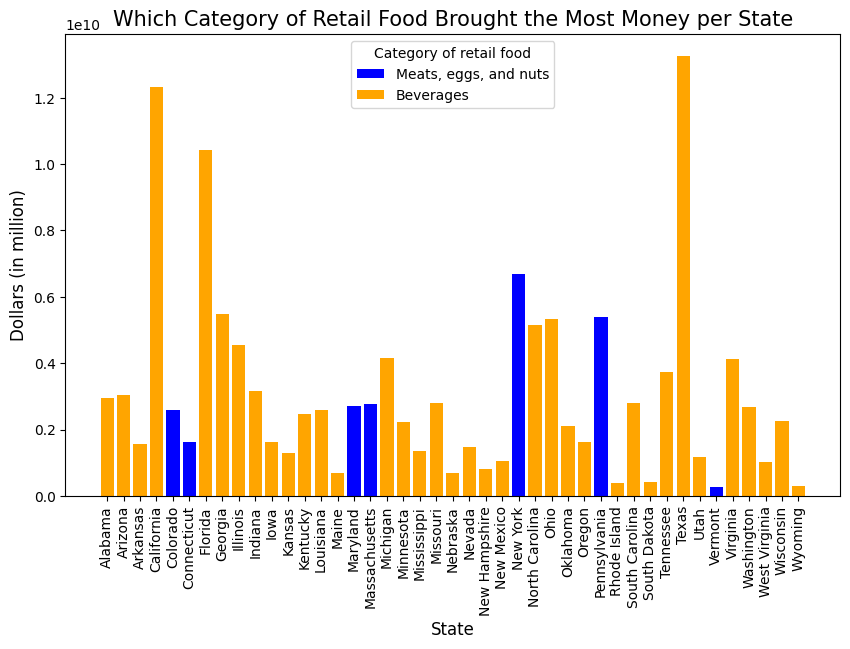

In [38]:
colors=results["Category"].values
bar_colors=[]
for i,color in enumerate(colors):
    if colors[i]=="Beverages":
        bar_colors.append("orange")
    if colors[i]=="Meats, eggs, and nuts":
        bar_colors.append("blue")
    #else: 
       # bar_colors.append("blue")
ys=results["Dollars"].values
xs=results["State"].values

fig,ax=plt.subplots()
ax.bar(xs,ys,color="blue")
ax.bar(xs,ys,color=bar_colors)

ax.set_xticklabels(xs,rotation=90)
fig.set_figheight(6)
fig.set_figwidth(10)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Dollars (in million)", fontsize=12)
plt.title('Which Category of Retail Food Brought the Most Money per State', fontsize=15)
plt.legend(["Meats, eggs, and nuts","Beverages"], title="Category of retail food")
plt.show()